# A Focus on European Wine 
**By: Anabelle Liao al4622**

## Project Background

This project’s purpose is to determine the worthiness of wines at different price points and to draw conclusions from general trends in the data. The project, for instance, explores whether there is justification for price premiums on particular wines. 

The subset of data that is used may be found at: http://www.bordoverview.com/?year=all&bank=both

The data subset covers the data of 5181 vintage wines between 2004 and 2016. 

## About The Dataset

### Attributes of the Dataset

* Wine: The wine name 
* Year: The year the grapes were harvested and wine was produced (min year: 2004; max year: 2016)
* AOC: The wine’s place of origin, stands for "Appellation d'origine contrôlée"
* Size: Size of the property involved in producing the wine (in hectares)
* RP: Ratings by Robert Parker, a wine critic for The Wine Advocate 
* NM: Ratings by Neal Martin, a wine critic who contributes to Wine-Journal
* JR: Ratings by Jancis Robinson, an English wine critic
* BD: Ratings by Michel Bettane and Thierry Desseauve, French wine critics for TAST
* JS: Ratings by James Suckling, American wine critic for 
* De: Ratings by Decanter, an English wine magazine
* RVF: Ratings from La Revue du Vin de France, a French wine magazine
* RG: Ratings by Rene Gabriel, a Swiss wine critic for WeinWisser
* Price: the initial price of the wine in the year it was produced
* +/-: the percentage price change of the wine since its produced year (until 2017)

### Accessing, Cleaning, and Normalizing the Dataset

* Code to access the subset of the data as a CSV file after downloading dataset as an HTML file (by parsing the HTML code): 

In [17]:
import pandas

file = open("./data.html")
data = pandas.io.html.read_html(file, encoding='utf-8')[0]

* Code to remove the columns “Class”, “By”, “TA”, “JL”, “PW” (i.e. irrelevant and less relevant data to do with the project):

In [18]:
data.drop(["Class.", "By", "TA", "JL", "PW"], axis=1, inplace=True)

* Code to clean the data (remove unwanted symbols):


In [19]:
import re

def cleanEntry(str):
    match = re.search(r"(-?(?:\d*\.)?\d+)(?:-(-?(?:\d*\.)?\d+))?", str)
    if match is None:
        return None
    else:
        groups = match.groups()
        if groups[1] is None:
            return float(groups[0])
        else:
            return (float(groups[0]) + float(groups[1])) / 2
        
data.rename(columns={"+/–": "+/-"}, inplace=True)
data.replace(["·", "\?", "½", "%", "€ ", "\+", "–"],
             ["", "", ".5", "", "", "", "-"],
             inplace=True, regex=True)
colsToClean = ["RP", "NM", "JR", "BD", "JS", "De", "RVF", "JA", "RG", "Price", "+/-"]
data[colsToClean] = data[colsToClean].applymap(cleanEntry)

* Code to normalize data (normalize ratings from 0 to 100):

In [20]:
ratingColNames = ["RP", "NM", "JR", "BD", "JS", "De", "RVF", "JA", "RG"]
for col in ratingColNames:
    data[col] -= data[col].min()
    data[col] /= data[col].max()
    data[col] *= 100

* Print data:

In [21]:
print(data)

                        Wine  Year                 AOC   Size         RP  \
0                  d'Agassac  2016          Haut-Médoc   35.0        NaN   
1                  d'Agassac  2015          Haut-Médoc   35.0        NaN   
2                  d'Agassac  2014          Haut-Médoc   35.0        NaN   
3                  d'Agassac  2013          Haut-Médoc   35.0        NaN   
4                  d'Agassac  2012          Haut-Médoc   35.0        NaN   
5                  d'Agassac  2011          Haut-Médoc   35.0        NaN   
6                  d'Agassac  2010          Haut-Médoc   35.0        NaN   
7                  d'Agassac  2009          Haut-Médoc   35.0  54.716981   
8                  d'Agassac  2008          Haut-Médoc   35.0        NaN   
9                  d'Agassac  2007          Haut-Médoc   35.0        NaN   
10                 d'Agassac  2006          Haut-Médoc   35.0        NaN   
11                 d'Agassac  2005          Haut-Médoc   35.0        NaN   
12          

## Finding Trends in the Dataset

Note: the median is mainly used to determine trends in the data, as median is generally a better indicator in case of any skewdness in the dataset (such as among prices, etc.). However, for appreciation amount, the mean is used to take into account the effect of outliers. 

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

### 1)	How consistent are wine ratings? 


count    4249.000000
mean       23.002116
std         7.659319
min         0.000000
25%        19.091772
50%        24.408286
75%        27.609218
max        55.239739
dtype: float64


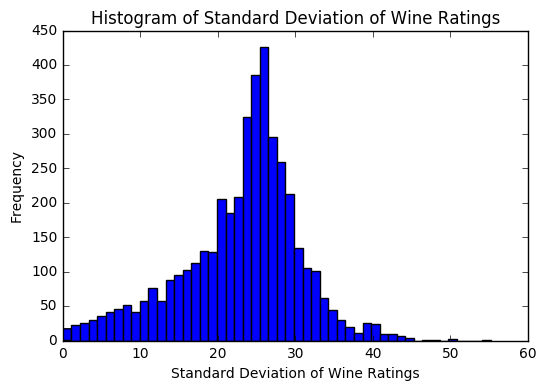

In [23]:
stddevs = data[ratingColNames].apply(lambda x: x.std(), axis=1)
print(stddevs.describe())

stddevs.plot.hist(bins=50)
plt.title("Histogram of Standard Deviation of Wine Ratings")
plt.xlabel("Standard Deviation of Wine Ratings")

While the figure above shows that the standard deviations of wine ratings is slightly skewed to the left, the figure appears to be approximately a normal distribution. 

The mean of standard deviations (approximately 23.0) and median of standard deviations (approximately 24.4) are quite high, suggesting that there is a high deviation among the wine ratings (which are normalized to be out of 100). 

The data thus suggest that wine ratings are not very consistent among different critics for the same wines. 

### 2) Do ratings actually justify the price at all price points? 

Correlation: 0.429060992556


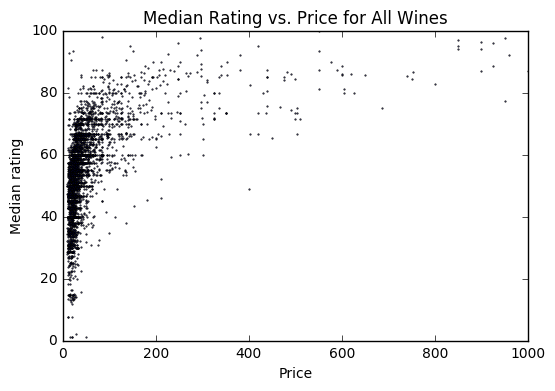

In [24]:
medianRatings = data[ratingColNames].apply(lambda x: x.median(), axis=1).rename("Median rating")
print("Correlation:", medianRatings.corr(data["Price"]))
pandas.concat([medianRatings, data["Price"]], axis=1)\
    .plot\
    .scatter(x="Price",
             y="Median rating",
             s=0.25,
             xlim=(0, 1000),
             ylim=(medianRatings.min(), medianRatings.max()),
             title="Median Rating vs. Price for All Wines")


The figure suggests that there may be a possible trend that higher-priced wines have higher ratings. In general, low-priced wines seem to achieve more lower scores than high-priced wines (it should be noted, however, that there are also more low-priced wines than high-priced wines in the data). Also, it is interesting that above a price point of around 400 euros, a median rating below 50 (out of a scale of 100) does not appear.

However, the figure also shows that many lower priced wines also achieve high ratings. In fact, some low-priced wines are shown to achieve ratings just as high as those of higher-priced wines. Even if there is a trend, the figure suggests a weak correlation, which is also supported by the correlation calculation between price and median rating of approximately 0.429. Furthermore, the data appear to be heteroscedastic; there is a greater variation in median rating among cheaper wines than more highly-priced wines.

As a result, we can cannot conclude whether ratings justify the price of wines at all price points, as there does not appear to be a statistically significant trend in the dataset.

### 3) Do ratings justify the price of luxury wines?  

Correlation: 0.405503096928


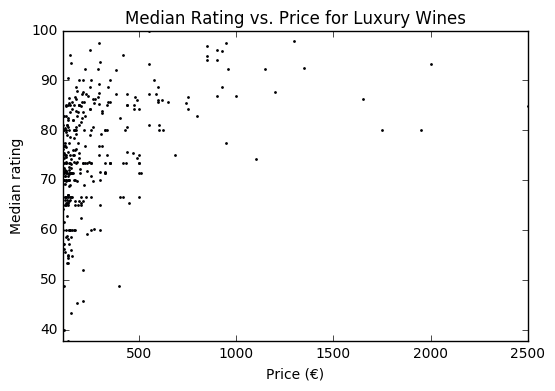

In [25]:
luxuryWines = data[data["Price"] > data["Price"].quantile(0.9)] 

medianRatings = luxuryWines[ratingColNames].apply(lambda x: x.median(), axis=1).rename("Median rating")
print("Correlation:", medianRatings.corr(data["Price"]))
pandas.concat([medianRatings, data["Price"]], axis=1)\
    .plot\
    .scatter(x="Price",
             y="Median rating",
             s=1,
             xlim=(luxuryWines["Price"].min(), luxuryWines["Price"].max()),
             ylim=(medianRatings.min(), medianRatings.max()),
             title="Median Rating vs. Price for Luxury Wines")\
    .set_xlabel("Price (€)")

To be categorized as a luxury wine, the price of the wine has been categorized as within the top decile of wine prices. 

Once again, the figure produced suggests that there is at most a very weak trend between price and median ratings of expensive wines. In fact, the correlation between price and median rating among luxury wines is lower than that between price and median rating among all wines. 

Overall, this suggests that higher or lower ratings do not seem to affect the price of wines. In addition, the data suggest that higher-priced wines do not necessarily yield higher critic ratings.

### 4)	What years yielded the highest rated wines? 

Year
2015    66.666667
2016    65.897436
2009    63.018868
2010    60.769231
2013    60.000000
2012    60.000000
2011    60.000000
2006    60.000000
2008    59.245283
2014    55.000000
2007    54.716981
2005    54.358974
2004    51.025641
Name: Median rating, dtype: float64


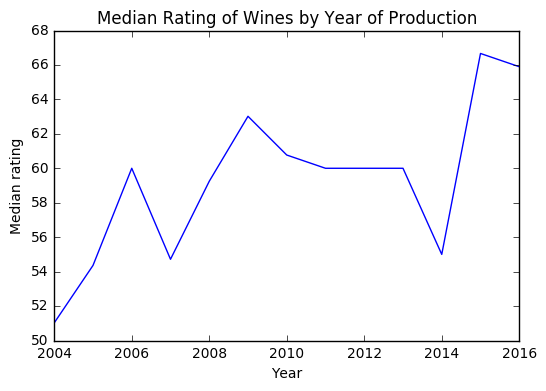

In [26]:
wineByYear = data.groupby(data["Year"]).median()
medianRatings = wineByYear[ratingColNames].apply(lambda x: x.median(), axis=1).rename("Median rating")
print(medianRatings.sort_values(ascending=False))
medianRatings.plot(title="Median Rating of Wines by Year of Production").set_ylabel("Median rating")

Given the dataset of wines from 2004 to 2016, the figure above suggests that 2015 and 2016 yielded wines with higher ratings. Yearly ratings were based on median ratings. From a numerical standpoint, the median rating of 2015 vintage wines is approximately 66.7 (on a scale of 100): this is only approximately 0.769 higher than the median rating of 2016 vintage wines. Interestingly enough, the high ratings in 2015 followed a year of quite low ratings in 2014. 

### 5)	Which regions yield higher-rated wines?

AOC
Sauternes                      69.811321
Pauillac                       62.264151
St-Julien                      61.538462
Pomerol                        60.000000
Pessac-Léognan                 60.000000
Margaux                        60.000000
St-Emilion GC                  60.000000
Côtes de Bourg                 57.500000
St-Estèphe                     57.142857
Fronsac                        55.000000
Graves                         54.858491
Médoc                          53.333333
Lalande de Pomerol             53.333333
Côtes de Castillon             53.333333
Canon-Fronsac                  52.830189
Premières Côtes de Bordeaux    52.500000
Côtes de Bordeaux              51.282051
Moulis                         50.000000
Haut-Médoc                     50.000000
Côtes de Blaye                 50.000000
Listrac-Médoc                  45.283019
Name: Median rating, dtype: float64


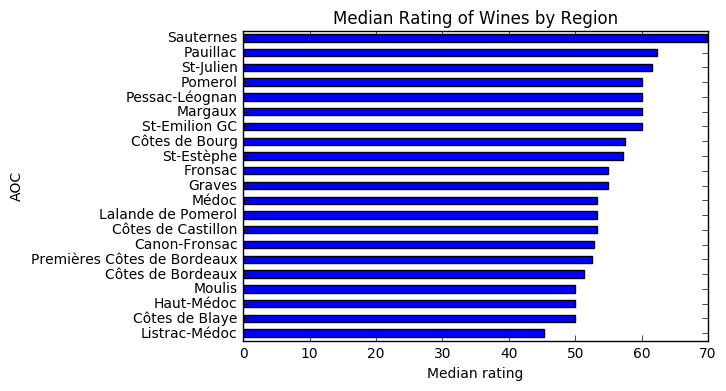

In [27]:
wineByRegion = data.groupby(data["AOC"]).median()
medianRatings = wineByRegion[ratingColNames].apply(lambda x: x.median(), axis=1).rename("Median rating")
sortedByRating = medianRatings.sort_values(ascending=False)
print(sortedByRating)
sortedByRating.plot.barh(title="Median Rating of Wines by Region")
plt.xlabel("Median rating")
plt.gca().invert_yaxis()

By looking at the median ratings of wines by region ("AOC" in the dataset), Sauternes appears to yield the highest rated wines (numerically, Sauternes's median rating is approximately 69.811 out of a scale of 100). The difference in median rating between Sauternes and Pauillac is quite high (approximately 7.55), suggesting that Sauternes produces wines that could potentially be considered better than the other locations.

Following Sauternes, Pauillac and St-Julien take the top three regions for producing highly-rated wine according to median wine ratings.

### 6)	Which regions yield more expensive wines?

It should be noted that the price of wines are right-skewed because of a few extremely expensive vintage wines. As such, both mean and median price appear (the mean is considered to take into account the effect of outliers):

AOC
Pomerol                        44.0
St-Julien                      42.5
Sauternes                      39.0
Pauillac                       38.5
Margaux                        33.0
St-Emilion GC                  33.0
Pessac-Léognan                 32.0
St-Estèphe                     27.0
Lalande de Pomerol             22.0
Moulis                         21.0
Côtes de Castillon             19.0
Fronsac                        16.0
Médoc                          15.0
Côtes de Bourg                 15.0
Canon-Fronsac                  15.0
Haut-Médoc                     14.0
Côtes de Blaye                 14.0
Listrac-Médoc                  13.0
Graves                         13.0
Côtes de Bordeaux              13.0
Premières Côtes de Bordeaux    12.0
Name: Price, dtype: float64


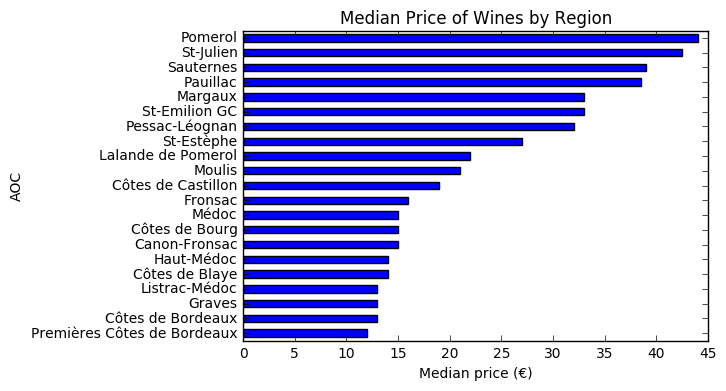

In [28]:
sortedByMedianPrice = data.groupby(data["AOC"]).median()["Price"].sort_values(ascending=False)
print(sortedByMedianPrice)
sortedByMedianPrice.plot.barh(title="Median Price of Wines by Region")
plt.xlabel("Median price (€)")
plt.gca().invert_yaxis()

Based on median prices, the figure identifies that Pomerol produces the most expensive wines (with a median wine price of 44 euros). Following Pomerol are St-Julien and Sauternes (with median wine prices of 42.5 and 39.0, respectively).

AOC
Pauillac                       101.737762
Pomerol                         89.675234
Pessac-Léognan                  72.608696
St-Emilion GC                   68.646552
Margaux                         56.740113
St-Julien                       56.064516
Sauternes                       50.582090
St-Estèphe                      37.786408
Lalande de Pomerol              28.138462
Moulis                          21.127660
Côtes de Bourg                  19.916667
Côtes de Castillon              19.616667
Médoc                           17.653333
Haut-Médoc                      17.614719
Fronsac                         16.728395
Canon-Fronsac                   15.375000
Côtes de Blaye                  14.333333
Côtes de Bordeaux               12.923077
Premières Côtes de Bordeaux     12.875000
Graves                          12.857143
Listrac-Médoc                   12.295455
Name: Price, dtype: float64


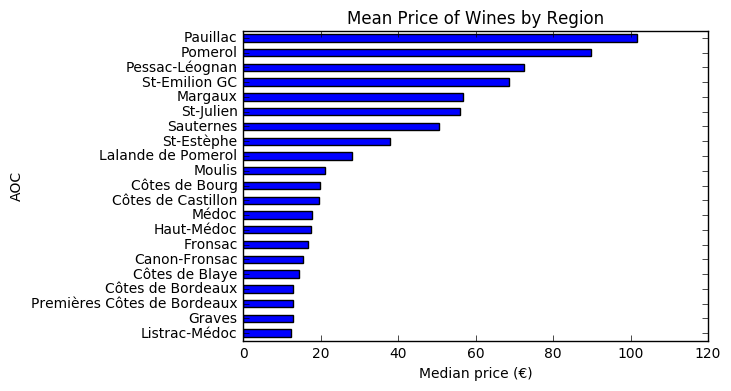

In [29]:
sortedByMeanPrice = data.groupby(data["AOC"]).mean()["Price"].sort_values(ascending=False)
print(sortedByMeanPrice)
sortedByMeanPrice.plot.barh(title="Mean Price of Wines by Region")
plt.xlabel("Median price (€)")
plt.gca().invert_yaxis()

Based on mean prices, Pauillac produces the most expensive wines (with a mean price of approximately 101.74 euros). The change in region can be explained by the fact that some wines are much more highly priced than others and thus skew the data.

Overall, Pomerol appears to be a top region to produce highly-priced wines since it appeared in both regions producing expensive wines based on mean and median prices. Pauillac was also placed fourth for producing highly-priced wines based on median prices. 

### 7)	What characteristics of wines tend to make wines appreciate over time? 

In order to determine what characteristics affect how wine appreciates over time, critic ratings, year, and place of origin are considered:

Correlation: 0.279094241367


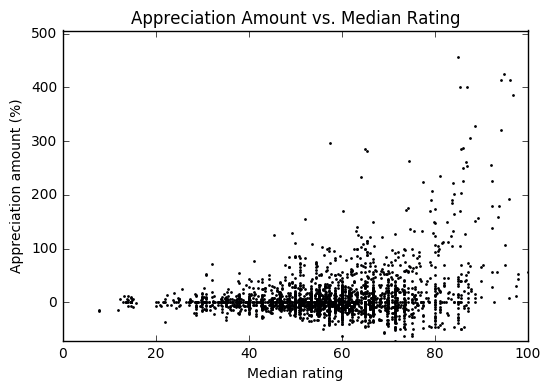

In [30]:
medianRatings = data[ratingColNames].apply(lambda x: x.median(), axis=1).rename("Median rating")
print("Correlation:", medianRatings.corr(data["+/-"]))

pandas.concat([medianRatings, data], axis=1)\
    .plot\
    .scatter(y="+/-",
             x="Median rating",
             s=1,
             ylim=(data["+/-"].min(), data["+/-"].max()),
             xlim=(medianRatings.min(), medianRatings.max()), title="Appreciation Amount vs. Median Rating")\
    .set_ylabel("Appreciation amount (%)")

In terms of critic ratings, the figure above suggests that median ratings and wine appreciation amounts have at most a very weak trend. In fact, there is a correlation of only approximately 0.279, which suggests that critic ratings likely are unrelated to whether a wine will appreciate and by how much. 

Year
2004          NaN
2005    66.425532
2006    -9.385768
2007    -6.457983
2008    -6.553648
2009    68.134783
2010    10.018182
2011   -16.009585
2012    -4.565217
2013    -3.560311
2014     8.638009
2015    22.535714
2016     0.000000
Name: +/-, dtype: float64


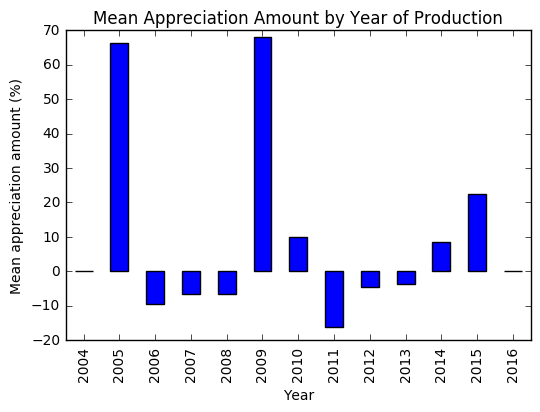

In [31]:
appreciationByYear = data.groupby(data["Year"]).mean()["+/-"]
print(appreciationByYear)

appreciationByYear.plot.bar()
plt.title("Mean Appreciation Amount by Year of Production")
plt.ylabel("Mean appreciation amount (%)")

In terms of year, the figure above shows that wines produced in 2005, 2009, 2010, 2014, and 2015 appreciated. The wines of 2009 seem to have appreciated the most (by a mean appreciation of approximately 68.13%). 2005 wines appreciated a similar amount at approximately 66.43%. 

It should be noted that there is a lack of 2004 and 2016 appreciation data. Thus, there appears to be 0% appreciation for both years.

AOC
Pauillac                       18.153226
St-Julien                      17.748503
Pomerol                        14.740061
Pessac-Léognan                 12.014019
Margaux                        10.281553
St-Emilion GC                  10.130904
St-Estèphe                      8.742690
Côtes de Blaye                  8.000000
Moulis                          3.923077
Haut-Médoc                      3.873684
Listrac-Médoc                   3.823529
Fronsac                         1.866667
Médoc                           1.709091
Lalande de Pomerol              0.083333
Côtes de Bordeaux               0.000000
Sauternes                      -0.346535
Côtes de Bourg                 -0.625000
Côtes de Castillon             -0.744681
Canon-Fronsac                  -2.000000
Graves                         -2.818182
Premières Côtes de Bordeaux    -3.750000
Name: +/-, dtype: float64


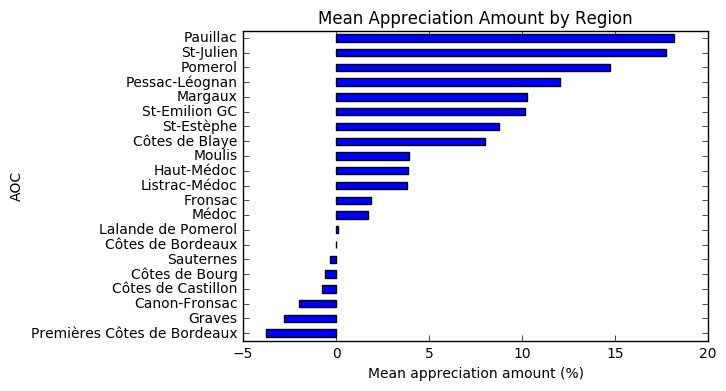

In [32]:
appreciationByRegion = data.groupby(data["AOC"]).mean()["+/-"].sort_values(ascending=False)
print(appreciationByRegion)

appreciationByRegion.plot.barh()
plt.title("Mean Appreciation Amount by Region")
plt.xlabel("Mean appreciation amount (%)")
plt.gca().invert_yaxis()

In terms of place of origin, wine from Pauillac, St-Julien, and more seem to have appreciated according to mean calculations. In fact, the majority of regions showed wines that appreciated over time. Pauillac wines, however, appreciated the most (at approximately 18.15%). 

Overall, while the data suggest that critic ratings do not directly affect wine appreciation amounts, the data allows for particular years and regions related to wine appreciation to be identified. 

## Overall Conclusions

According to the dataset used, the wine market appears to be quite unpredictable. Critic ratings seem to vary and few trends persist in terms of price valuation. What determines the prices of expensive wines can only be explained by weak trends in the dataset.

It should be noted, however, that a dataset of 5181 entries is fairly small. In addition, because there are a few entries missing in certain columns, there is potential bias in the dataset. A larger and fuller dataset to be used in the future may lead to different conclusions.

Nevertheless, a few interesting conclusions are revealed from the analysis. One is that within Europe, there are a few particular locations suggest to be "good" wine locations. Sauternes is an example of one, as the location appears as a top three candidate yielding both high prices and high ratings. Another interesting conclusion is that there are quite a few highly-rated wines that depreciate quite a bit, demonstrated by the figure "Appreciation Amount vs. Median Rating".
 
Ultimately, enjoyment of vintage wines is subjective to each person. Whether certain wines are worthy at their price point remains a mystery, as ratings suggest only a weak correlation with wine price. 

While this project focused on external factors that may potentially affect wine valuation, further analysis of wine valuation may require analyzing data of internal factors affecting wine creation, such as precipitation, soil acidity, and more. 